# 01) 워드 임베딩

* 단어를 벡터로 표현하는 방법으로, 단어를 밀집 표현으로 반환.

### 희소 표현
* 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법을 희소표현이라고 합니다.
* 원-핫 벡터는 희소 벡터입니다.

#### 희소표현의 문제점
*  단어의 개수가 늘어나면 벡터의 차원이 한없이 커집니다. -> 공간적 낭비
*  단어의 의미를 담지못합니다.
* 강아지 = [0 0 0 0 1 0 0 0 0 ... 0 ] 차원 : 10000

### 밀집 표현 
* 벡터의 차원을 단어 집합의 크기로 설정하지 않습니다. -> 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춥니다.
* 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 .... ] 차원 : 128 -> 밀집 벡터

### 워드 임베딩
* 단어를 밀집 벡터의 형태로 표현하는 방법을 워드 임베딩이라고 합니다.
* 워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove 등이 있습니다.






# 02) Word2Vec
* 단어에 대해서 벡터 연산을 할 수 있다 (고양이 + 애교 = 강아지, 한국 - 서울 + 도쿄 = 일본)
* 각 단어 벡터가 단어간 유사도를 반영한 값을 가지고 있기 때문입니다.

### 분산표현
* 기본적으로 분포 가설이라는 가정 하에 만들어진 표현방법입니다.
 ( '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다' )
* 분포 가설을 이용하여 단어들의 집합을 학습하고, 벡터에 단어의 의미를 여러 차원에 분산하여 표현합니다.
* 희소 표현이 고차원에 각 차원이 분리된 표현 방법이었다면, 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산하여 표현합니다.
(단어 간 유사도를 계산할 수 있음)

### CBOW (Continous Bag of Words)
* 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법입니다.
* 윈도우 -> 중심단어를 예측하기 위해서 앞, 뒤로 볼 단어의 개수
* 예시 : 윈도우의 크기 = 2
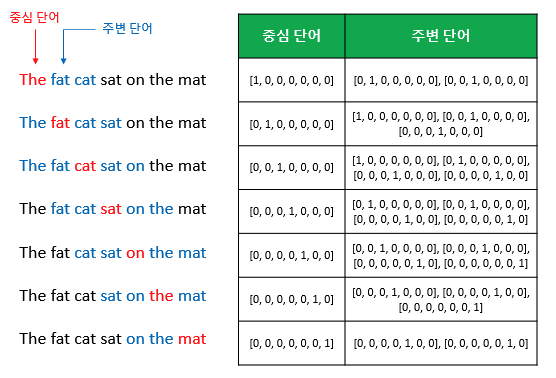


# 03) 영어/한국어 Word2Vec 실습

### 1. 영어 Word2Vec 만들기

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

## 훈련 데이터

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f63746d1810>)

In [ ]:
f = open('ted_en-20160408.xml','r')
str = f.read()
print(str)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



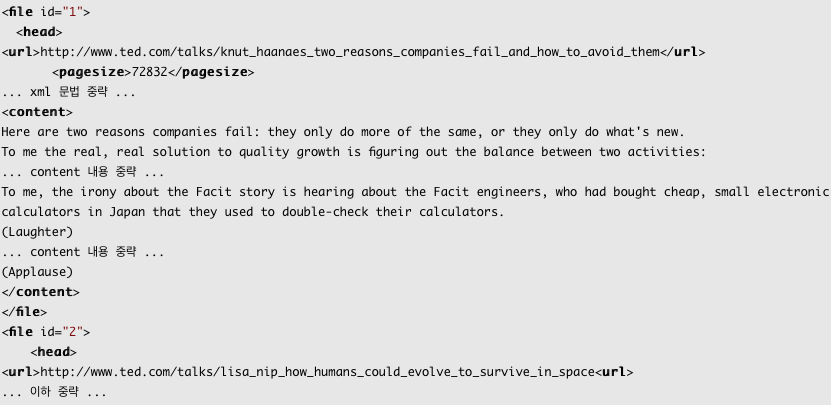

## 훈련 데이터 전처리하기

In [ ]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))
for line in result[:3]:
    print(line)

총 샘플의 개수 : 273424
['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


## Word2Vec 훈련시키기


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)
#size = 워드 벡터의 특징 값, 즉, 임베딩된 벡터의 차원
#window = 컨텍스트 윈도우 크기
#min_count = 단어의 최소 빈도 수 제한( 빈도가 적은 단어들은 학습하지 않는다. )
#workers = 학습을 위한 프로세스 수
#sg = 0 -> CBOW , 1 -> Skip-gram

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.858809232711792), ('guy', 0.8137094974517822), ('lady', 0.7914576530456543), ('gentleman', 0.7853865027427673), ('boy', 0.7606436014175415), ('girl', 0.756858229637146), ('soldier', 0.7481527924537659), ('kid', 0.6881287097930908), ('poet', 0.6843830347061157), ('rabbi', 0.6765747666358948)]


## Word2Vec 모델 저장하고 로드하기

In [ ]:
#pass
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.858809232711792), ('guy', 0.8137094974517822), ('lady', 0.7914576530456543), ('gentleman', 0.7853865027427673), ('boy', 0.7606436014175415), ('girl', 0.756858229637146), ('soldier', 0.7481527924537659), ('kid', 0.6881287097930908), ('poet', 0.6843830347061157), ('rabbi', 0.6765747666358948)]


## 2. 한국어 Word2Vec 만들기 (네이버 영화 리뷰)

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 235kB/s 
     |████████████████████████████████| 460kB 35.3MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
#pass
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f6319ba8310>)

In [ ]:
!head ratings.txt

id	document	label
8112052	어릴때보고 지금다시봐도 재밌어요ㅋㅋ	1
8132799	디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.	1
4655635	폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.	1
9251303	와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지	1
10067386	안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.	1
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
7477618	굿	1


In [ ]:
#데이터 주기
train_data = pd.read_table('ratings.txt')
train_data[:5] # 상위 5개 출력
print(len(train_data)) # 리뷰 개수 출력
print(train_data.isnull().values.any()) #NULL 값 존재 유무

200000
True


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인
print(len(train_data)) # 리뷰 개수 출력

False
199992


In [ ]:
#정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
#불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


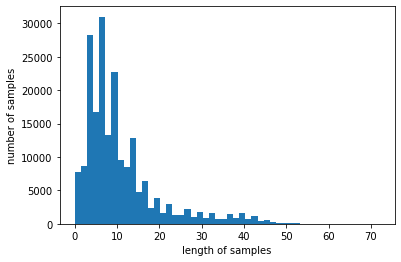

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#pass
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
model.wv.save_word2vec_format('kor_w2v') # 모델 저장
model = KeyedVectors.load_word2vec_format("kor_w2v") # 모델 로드

KeyboardInterrupt: ignored

In [ ]:
model = KeyedVectors.load_word2vec_format("kor_w2v") # 모델 로드

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar("영화"))

[('애니', 0.6121960878372192), ('공포영화', 0.5938882827758789), ('독립영화', 0.5900203585624695), ('다큐', 0.578542947769165), ('애니메이션', 0.5650038719177246), ('작품', 0.5553209781646729), ('수작', 0.5483027696609497), ('이영화', 0.5306011438369751), ('다큐멘터리', 0.529232382774353), ('액션영화', 0.5217604637145996)]


In [ ]:
print(model.wv.most_similar("이민호"))

[('유해진', 0.8960200548171997), ('서인국', 0.8932139873504639), ('주지훈', 0.8914817571640015), ('이준기', 0.8883805274963379), ('송윤아', 0.8874680995941162), ('이미숙', 0.8818123936653137), ('성동일', 0.8809049129486084), ('고준희', 0.8805584907531738), ('이승기', 0.8803162574768066), ('소지섭', 0.8777517080307007)]


## 3. 한국어 Word2Vec 만들기 (위키피디아)

### 한국어 덤프파일 다운로드
* https://dumps.wikimedia.org/kowiki/latest/
* kowiki-latest-pages-articles.xml.bz2

In [1]:
#위키피디아 익스트랙터 다운로드
!git clone "https://github.com/attardi/wikiextractor.git"  

Cloning into 'wikiextractor'...
remote: Enumerating objects: 742, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 742 (delta 0), reused 0 (delta 0), pack-reused 741
Receiving objects: 100% (742/742), 1.28 MiB | 21.85 MiB/s, done.
Resolving deltas: 100% (433/433), done.


In [5]:
!python ./wikiextractor/wikiextractor/WikiExtractor.py ./wikiextractor/wikiextractor/kowiki-latest-pages-articles.xml.bz2

Traceback (most recent call last):
  File "./wikiextractor/wikiextractor/WikiExtractor.py", line 66, in <module>
    from .extract import Extractor, ignoreTag, define_template, acceptedNamespaces
ImportError: attempted relative import with no known parent package


# PASS......

## 4. 사전 훈련된 Word2Vec 임베딩

### 영어

In [ ]:
import gensim

# 구글의 사전 훈련된 Word2Vec 모델을 로드합니다.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin 파일 경로', binary=True)
print(model.vectors.shape) # 모델의 크기 확인  

In [ ]:
print (model.similarity('this', 'is')) # 두 단어의 유사도 계산하기
print (model.similarity('post', 'book'))

In [ ]:
print(model['book']) # 단어 'book'의 벡터 출력

### 한국어

https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('ko.bin')

In [ ]:
result = model.wv.most_similar("강아지")
print(result)

# 네거티브 샘플링을 이용한 Word2Vec 구현 (Skip-Gram)

* Word2Vec의 출력층에서는 소프트맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터 값을 업데이트합니다.

* 만약 단어 집합의 크기가 수만 이상에 달한다면 이 작업은 굉장히 무거운 작업이므로, Word2Vec은 꽤나 학습하기에 무거운 모델이 됩니다.

* 고양이, 귀여운 - > 회의실, 컴퓨터, 돈가스도 업데이트 해야함.



## 1. 네거티브 샘플링(Negative Sampling)

### skip gram
* 중심 단어로부터 주변 단어를 예측하는 모델
* The fat cat sat on the mat -> cat(중심 단어)로 부터 The, fat, sat, on을 예측합니다.
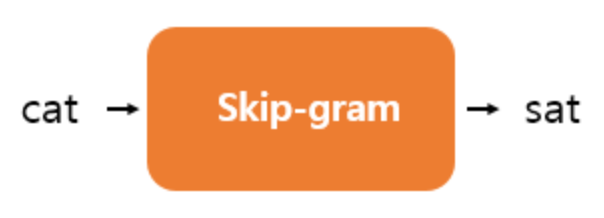
### Skip-Gram with Negative Sampling
* 중심 단어와 주변 단어가 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 확률을 예측합니다.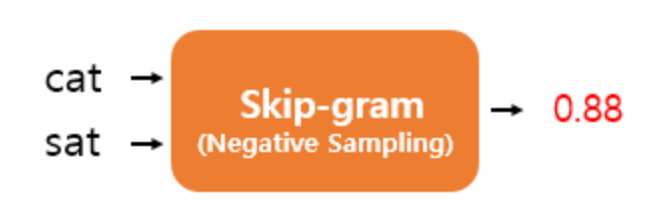


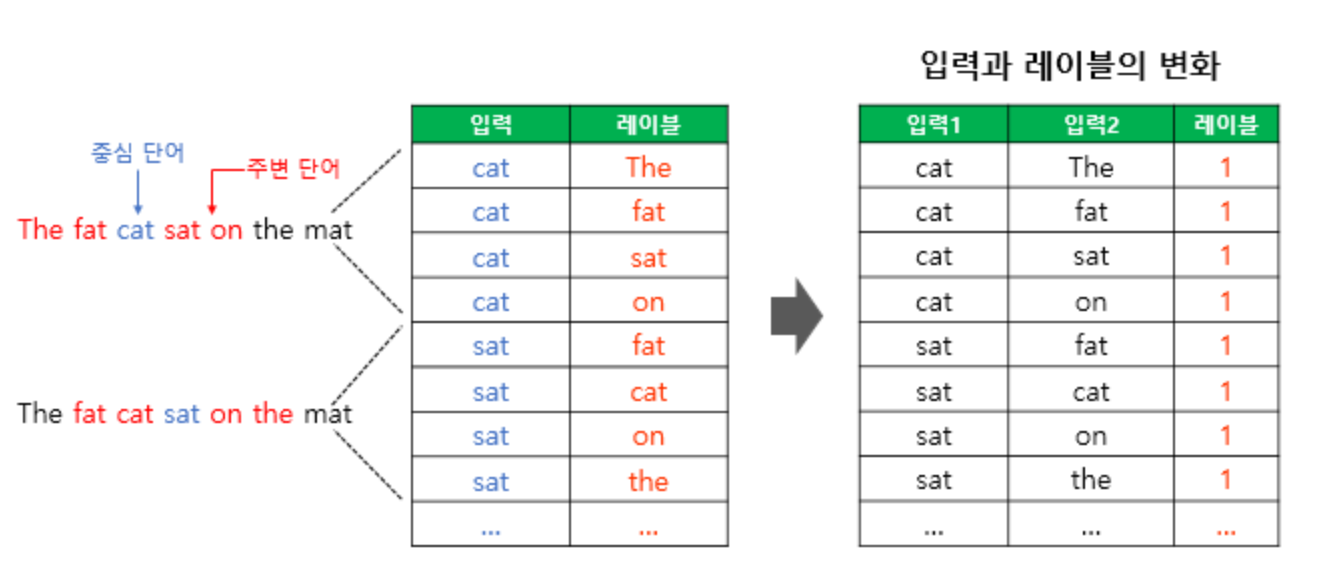

* Skip-gram 데이터 셋에서 중심 단어와 주변 단어를 각각 입력1, 입력2로 둡니다. 이 둘은 실제로 윈도우 크기 내에서 이웃 관계였으므로 레이블은 1로합니다.
* 레이블이 0인 샘플들 -> 이웃관계가 아님 -> 단어집합에서 랜덤으로 선택된 단어들

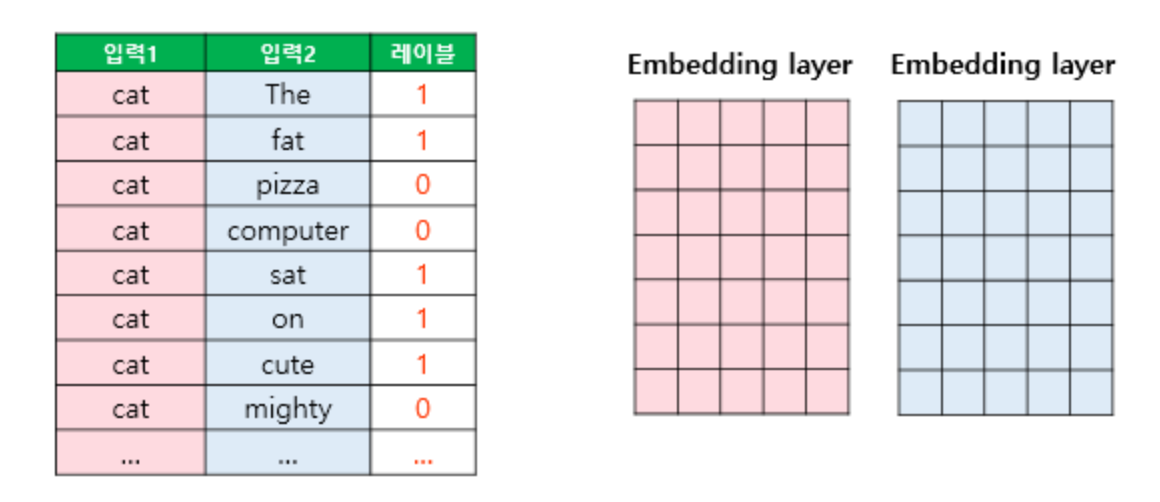

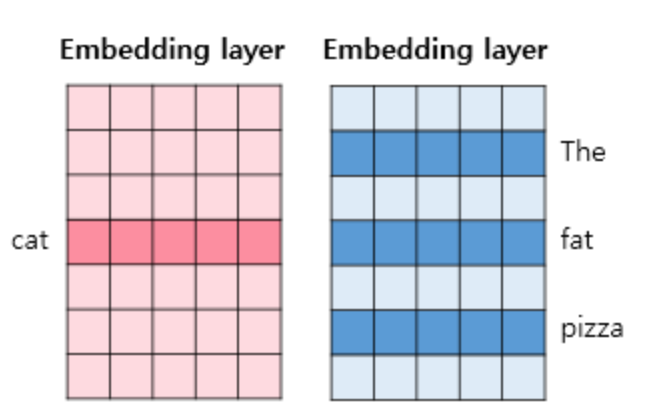

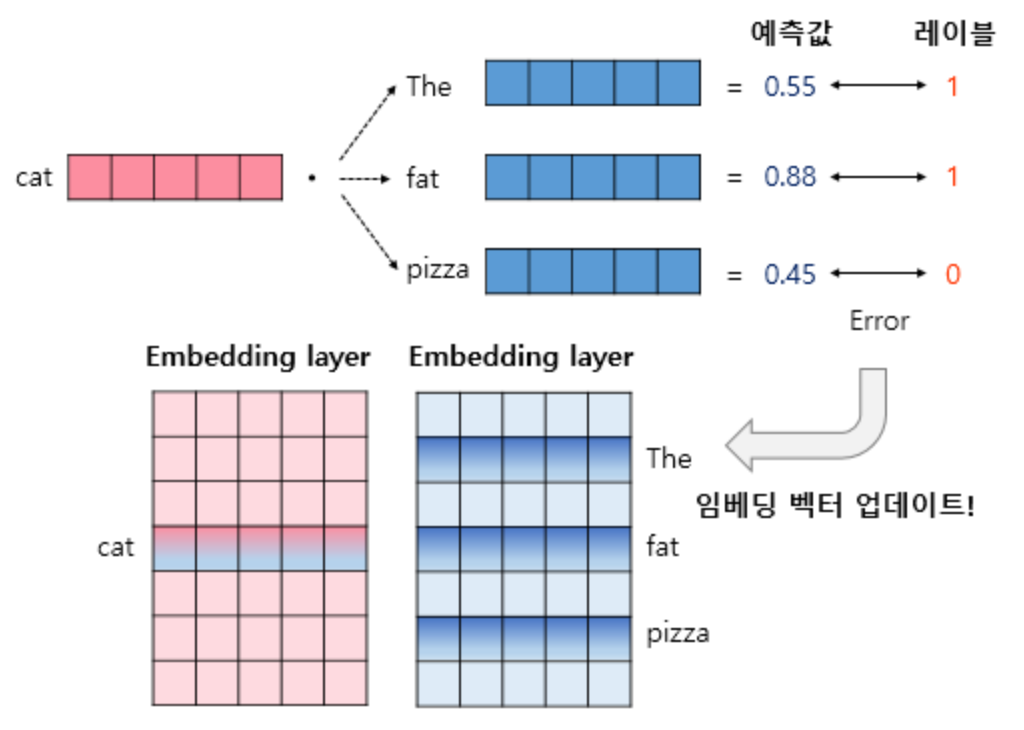

* 중심 단어와 주변 단어의 내적값을 이 모델의 예측 값으로 하고, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트합니다.


## 03. 20뉴스그룹 데이터 전처리하기

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [ ]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
news_df.isnull().values.any()
# null 값 제거
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()
# 빈 값(empty) null로 바꾸고 null 제거
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [ ]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)
#상위 2개 샘플 출력
print(encoded[:2])

vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)


[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]
단어 집합의 크기 : 64277


## 04. 네거티브 샘플링을 통한 데이터셋 구성하기
* 앞에서는 토큰화, 정제, 정규화, 불용어 제거, 정수 인코딩까지 일반적인 전처리 과정을 거쳤습니다.
* 네거티브 샘플링을 통한 데이터셋을 구성할 차례입니다.
(시간이 많이 소요되서 상위 10개의 뉴스그룹 샘플만 사용)

In [ ]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

* 윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록 하고, 그렇지 않은 경우는 0의 레이블을 가지도록 하여 데이터셋을 구성

In [ ]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(existance (4865), letter (705)) -> 1
(atrocities (4406), halderc (35524)) -> 0
(seem (207), biased (3278)) -> 1
(daily (1920), makes (228)) -> 1
(government (51), ejection (53810)) -> 0


In [ ]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [ ]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

2220
2220


## 05. Skip-Gram with Negative Sampling (SGNS)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
embed_size = 100
# 임베딩 벡터의 차원 = 100 -> 하이퍼파라미터

In [ ]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       6427700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       6427700     input_2[0][0]                    
______________________________________________________________________________________________

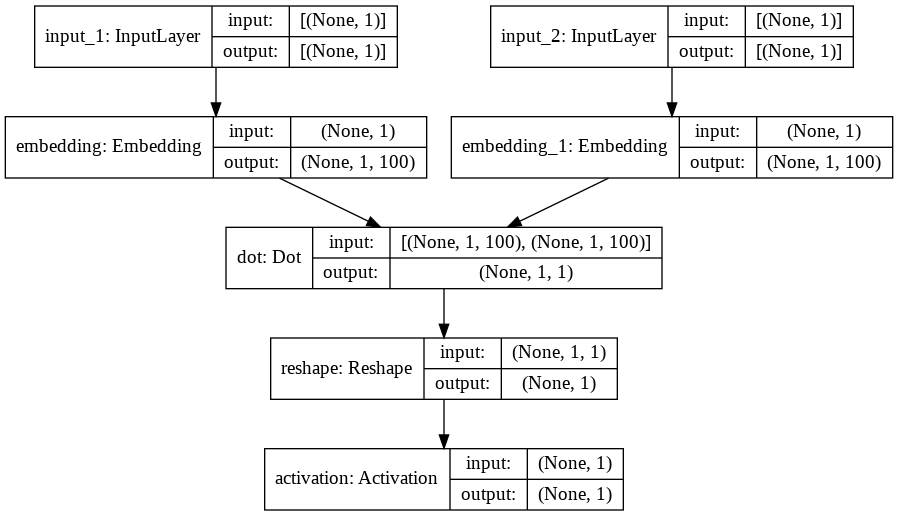

In [ ]:
# 시그모이드 함수를 활성화 함수를 거쳐 최종 예측값을 얻습니다.
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)

output = Activation('sigmoid')(dot_product)
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4629.997775949538
Epoch : 2 Loss : 3672.210791826248
Epoch : 3 Loss : 3508.7598068434745
Epoch : 4 Loss : 3305.1865510977805
Epoch : 5 Loss : 3080.5613268846646


## 06. 결과 확인하기

In [ ]:
import gensim
# 학습된 임베딩 벡터들을 vector.txt에 저장
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
#단어간 유사도 구하기
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['soldiers'])

[('azerbaijani', 0.7912600636482239),
 ('shelling', 0.7868121862411499),
 ('massacred', 0.7858105897903442),
 ('perpetrated', 0.7747560739517212),
 ('baku', 0.7738474607467651),
 ('occupied', 0.7731153964996338),
 ('turkish', 0.7690049409866333),
 ('troops', 0.7685524225234985),
 ('towns', 0.768165111541748),
 ('asala', 0.7639994621276855)]

In [ ]:
w2v.most_similar(positive=['doctor'])

[('anyhow', 0.5639176368713379),
 ('allergic', 0.5455765128135681),
 ('severe', 0.5419421792030334),
 ('cure', 0.5387985706329346),
 ('prescription', 0.5272785425186157),
 ('pratt', 0.5240418314933777),
 ('symptoms', 0.517612636089325),
 ('drugs', 0.5173696279525757),
 ('infection', 0.5079244375228882),
 ('hurt', 0.5078096389770508)]

In [ ]:
w2v.most_similar(positive=['police'])

[('handgun', 0.6433283686637878),
 ('terrorism', 0.6117343902587891),
 ('rifles', 0.5943120718002319),
 ('abiding', 0.5851247906684875),
 ('filed', 0.5781522989273071),
 ('crime', 0.578031063079834),
 ('gathered', 0.5748815536499023),
 ('murderous', 0.5730955600738525),
 ('armed', 0.5691218972206116),
 ('towns', 0.5674684047698975)]